In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [14]:
train_mod = ImageDataGenerator(
    rescale=1./255, #ajustar valores RGB al rango [0,1]
    rotation_range=40, #añade rotación aleatoria a las imágenes
    width_shift_range=0.2, #desplazamientos horizontales de la imagen
    height_shift_range=0.2, #desplazamientos verticales
    shear_range=0.2, #recortes
    zoom_range=0.2, #zoom aleatorio
    horizontal_flip=True, #espejo
    fill_mode='nearest')

#para validar no transformaremos las imágenes
test_mod = ImageDataGenerator(rescale=1./255)

train = train_mod.flow_from_directory(
    r'C:\Users\antdu\OneDrive\Escritorio\Master\Técnicas de Desarrollo Avanzado de Aplicaciones Big Data\Actividad 2\archive\training_set\training_set',
    target_size=(150, 150), #tamaño de las imágenes
    batch_size=32, #muestras para cada iteración
    class_mode='binary')

test = test_mod.flow_from_directory(
    r'C:\Users\antdu\OneDrive\Escritorio\Master\Técnicas de Desarrollo Avanzado de Aplicaciones Big Data\Actividad 2\archive\test_set\test_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


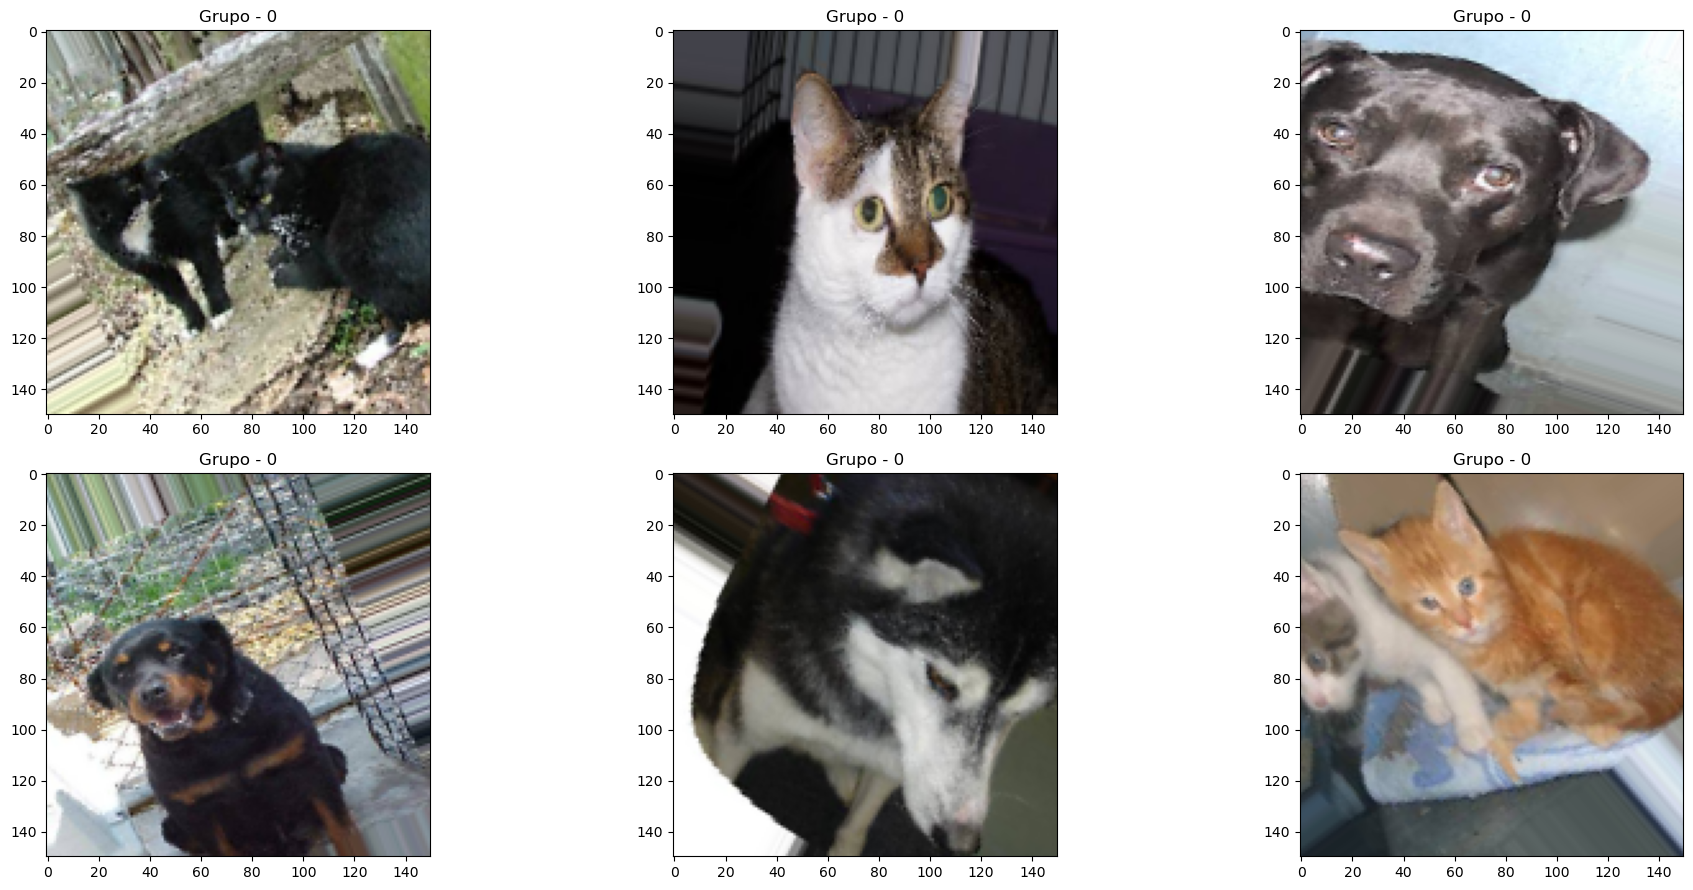

In [15]:
#mostramos las 6 primeras imagenes
fig, axes = plt.subplots(2, 3, figsize=(20, 9)) 
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(train[0][0][i]) # para coger las imagenes
    ax.set_title(label=f'Grupo - {np.argmax(train[0][1][i])}') # para coger que tipo de imagen es

plt.tight_layout()
plt.show()

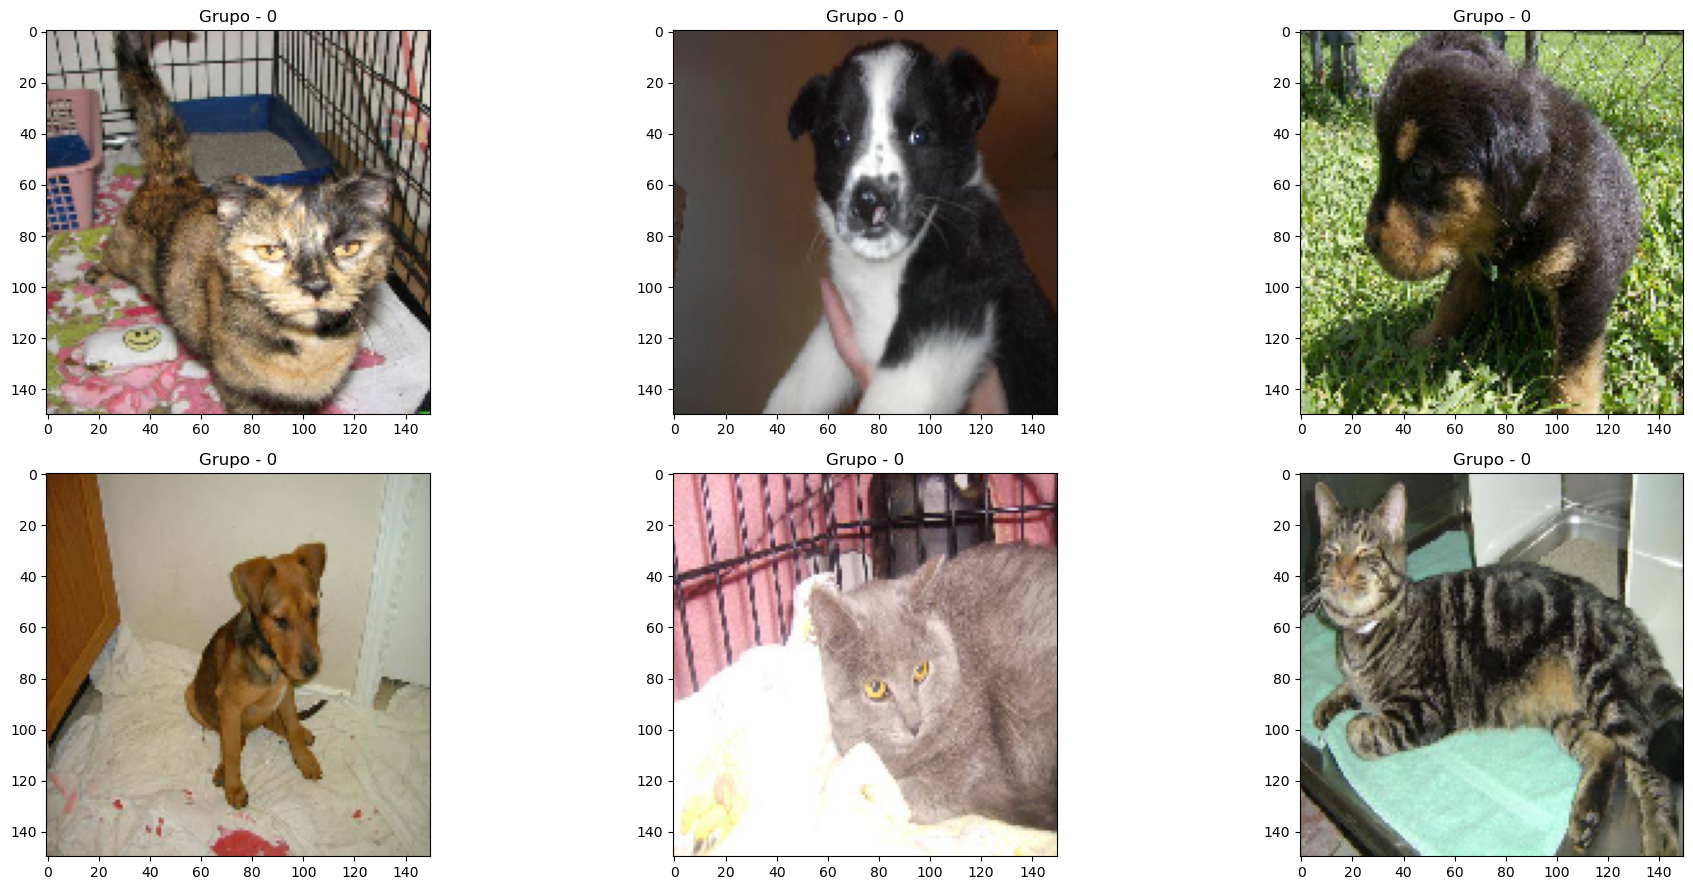

In [16]:
#mostramos las 6 primeras imagenes
fig, axes = plt.subplots(2, 3, figsize=(20, 9)) 
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(test[0][0][i]) # para coger las imagenes
    ax.set_title(label=f'Grupo - {np.argmax(test[0][1][i])}') # para coger que tipo de imagen es

plt.tight_layout()
plt.show()

In [16]:
#no relanzar siempre
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train,
    steps_per_epoch=100,
    epochs=100,
    validation_data=test,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 41s 406ms/step - loss: 0.7058 - accuracy: 0.5094 - val_loss: 0.6925 - val_accuracy: 0.4994
Epoch 2/100
100/100 [==============================] - 41s 413ms/step - loss: 0.6935 - accuracy: 0.5066 - val_loss: 0.6921 - val_accuracy: 0.5256
Epoch 3/100
100/100 [==============================] - 44s 444ms/step - loss: 0.6935 - accuracy: 0.4991 - val_loss: 0.6930 - val_accuracy: 0.5013
Epoch 4/100
100/100 [==============================] - 38s 381ms/step - loss: 0.6923 - accuracy: 0.5408 - val_loss: 0.6881 - val_accuracy: 0.5656
Epoch 5/100
100/100 [==============================] - 39s 385ms/step - loss: 0.6881 - accuracy: 0.5537 - val_loss: 0.6787 - val_accuracy: 0.5694
Epoch 6/100
100/100 [==============================] - 41s 410ms/step - loss: 0.6854 - accuracy: 0.5597 - val_loss: 0.6888 - val_accuracy: 0.5381
Epoch 7/100
100/100 [==============================] - 41s 411ms/step - loss: 0.6879 - accuracy: 0.5581 - val_loss: 0.6809 -

In [17]:
loss, accuracy = model.evaluate(test)

64/64 [==============================] - 7s 101ms/step - loss: 0.2504 - accuracy: 0.8937


In [18]:
model.save('modelo.h5')

usamos este modelo en un .py y ejecutamos esta línea:

streamlit run C:\Users\antdu\anaconda3\envs\Tensorflow\lib\site-packages\modelo_perro_gato.py

esta no va:
streamlit run C:\Users\antdu\OneDrive\Escritorio\Master\Técnicas de Desarrollo Avanzado de Aplicaciones Big Data\Actividad 2\modelo_perro_gato.py